In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [47]:
# Read in both CSVs
df_red = pd.read_csv('Desktop/Module 20/winequality-red.csv')
df_white = pd.read_csv('Desktop/Module 20/winequality-white.csv')

In [48]:
df_red.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [49]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [50]:
## Data Cleaning 

In [51]:
# Compile lists containing null / na analyses, along with dType determinations

# Red, Null
null_red = list(df_red.isnull().sum())
null_red.extend(["Count Null","red"])

# White, Null
null_white = list(df_white.isnull().sum())
null_white.extend(["Count Null","white"])

# Red, NA
na_red = list(df_red.isna().sum())
na_red.extend(["Count NA","red"])

# White, NA
na_white = list(df_white.isna().sum())
na_white.extend(["Count NA","white"])

# Red dTypes
red_types = [x.name for x in df_red.dtypes]
red_types.extend(["dType","red"])

# White dTypes
white_types = [x.name for x in df_white.dtypes]
white_types.extend(["dType","white"])

# List of measurements by which the wine was analyzed
chem_analyses = list(df_white.columns.values)
chem_analyses.extend(["Analysis","Wine Type"])

In [81]:
# Missing Data

def percent_missing(data):
    return data.isnull().sum().divide(len(data)).sort_values(ascending=False)

percent_missing(df_red).head()
percent_missing(df_white).head()


fixed acidity       0.0
volatile acidity    0.0
citric acid         0.0
residual sugar      0.0
chlorides           0.0
dtype: float64

In [52]:
# Create DF with lists
analysis_df = pd.DataFrame([null_red,null_white,na_red,na_white,red_types,white_types],columns=chem_analyses)

In [53]:
# Set index to make multi-indexed DF
analysis_df.set_index(["Wine Type","Analysis"]).sort_index()

fixed acidity volatile acidity citric acid  \
Wine Type Analysis                                                
red       Count NA               0                0           0   
          Count Null             0                0           0   
          dType            float64          float64     float64   
white     Count NA               0                0           0   
          Count Null             0                0           0   
          dType            float64          float64     float64   

                     residual sugar chlorides free sulfur dioxide  \
Wine Type Analysis                                                  
red       Count NA                0         0                   0   
          Count Null              0         0                   0   
          dType             float64   float64             float64   
white     Count NA                0         0                   0   
          Count Null              0         0                   0   
          dType             float64   float64             float64   

                     total sulfur dioxide  density       pH sulphates  \
Wine Type Analysis                                                      
red       Count NA                      0        0        0         0   
          Count Null                    0        0        0         0   
          dType                   float64  float64  float64   float64   
white     Count NA                      0        0        0         0   
          Count Null                    0        0        0         0   
          dType                   float64  float64  float64   float64   

                      alcohol quality  
Wine Type Analysis                     
red       Count NA          0       0  
          Count Null        0       0  
          dType       float64   int64  
white     Count NA          0       0  
          Count Null        0       0  
          dType       float64   int64

In [54]:
## Data Exploration

In [55]:
# Quality 

In [56]:
# Add column to label wine type
df_red["type"] = 'red'
df_white["type"] = 'white'

In [57]:
# Quality Score Distribution 

In [58]:
# Count number of values per score, per wine type (normalize creates a percent of total value)
red_quality = df_red['quality'].value_counts(normalize=True)
white_quality = df_white['quality'].value_counts(normalize=True)

In [79]:
# Create empty DF for both wine types, and quality scores from 1 to 10
quality_perc = pd.DataFrame(columns=('Red','White'),index=list(range(1,11)))

# Input quality counts to DF
quality_perc['Red'] = red_quality
quality_perc['White'] = white_quality

# Fill blanks with 0's
quality_perc.fillna(0,inplace=True)

quality_perc

,Red,White
1,0.000000,0.000000
2,0.000000,0.000000
3,0.006254,0.004083
4,0.033146,0.033279
5,0.425891,0.297468
6,0.398999,0.448755
7,0.124453,0.179665
8,0.011257,0.035729
9,0.000000,0.001021
10,0.000000,0.000000


Text(0, 0.5, '% of Total Wines, by Type')

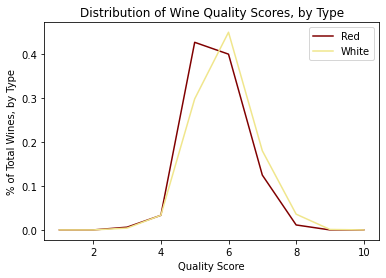

In [60]:
# Visualize 
colors = ['maroon','khaki']
ax = quality_perc.plot(color=colors,title="Distribution of Wine Quality Scores, by Type")
ax.set_xlabel("Quality Score")
ax.set_ylabel("% of Total Wines, by Type")

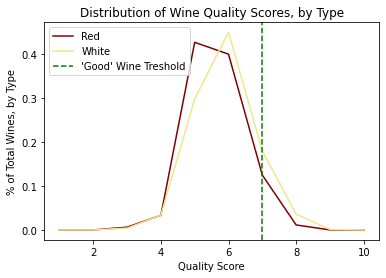

In [61]:
# Determine "Good" wine threshold 
colors = ['maroon','khaki']
ax = quality_perc.plot(color=colors,title="Distribution of Wine Quality Scores, by Type")
ax.set_xlabel("Quality Score")
ax.set_ylabel("% of Total Wines, by Type")

# threshold at 7
plt.axvline(7, color='g',linestyle='--')
plt.legend(["Red", "White","'Good' Wine Treshold"]);

In [62]:
# Add Classification Column 

In [70]:
# If wine >= 7, label it "good"

df_red['class'] = ['good' if x >=7 else 'bad' for x in df_red['quality']]
df_white['class'] = ['good' if x >=7 else 'bad' for x in df_white['quality']]

df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,bad


In [71]:
# Read in both CSVs

df_red.to_csv('Desktop/Module 20/red_classified.csv')
df_white.to_csv('Desktop/Module 20/white_classified.csv')

In [72]:
# Note
# The following combined CSV is to be recreate in SQL, per project guidelines

In [73]:
df_combined = df_red.append(df_white)
df_combined

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,bad
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,bad
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,bad
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,good


In [75]:
df_combined.to_csv('Desktop/Module 20/combined_and_classified')

In [91]:
df_combined.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

In [ ]:
# Counts

In [96]:
df_combined = pd.concat([df_combined], axis=1)

print("Number of rows BEFORE merging:", df_red.shape[0])
print("Number of columns BEFORE merging:", df_red.shape[1])

print("Number of rows BEFORE merging:", df_white.shape[0])
print("Number of columns BEFORE merging:", df_white.shape[1])

print("\nNumber of rows AFTER merging:", df_combined.shape[0])
print("Number of columns AFTER merging:", df_combined.shape[1])


Number of rows BEFORE merging: 1599
Number of columns BEFORE merging: 14
Number of rows BEFORE merging: 4898
Number of columns BEFORE merging: 14

Number of rows AFTER merging: 6497
Number of columns AFTER merging: 14


In [112]:
# Get the number of white and red
new_count = df_combined.groupby(["type"]).count()["class"]
new_count.head()

type
red      1599
white    4898
Name: class, dtype: int64

In [114]:
# Get average quality
avg = df_combined.groupby(["type"]).mean()["quality"]
avg.head()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [115]:
# Get average pH
avg = df_combined.groupby(["type"]).mean()["pH"]
avg.head()

type
red      3.311113
white    3.188267
Name: pH, dtype: float64

In [ ]:
# Outliers

In [118]:
df_combined.describe()[['quality','alcohol','sulphates','density']]

,quality,alcohol,sulphates,density
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,5.818378,10.491801,0.531268,0.994697
std,0.873255,1.192712,0.148806,0.002999
min,3.000000,8.000000,0.220000,0.987110
25%,5.000000,9.500000,0.430000,0.992340
50%,6.000000,10.300000,0.510000,0.994890
75%,6.000000,11.300000,0.600000,0.996990
max,9.000000,14.900000,2.000000,1.038980


In [99]:
# Bar Graphs

<AxesSubplot:>

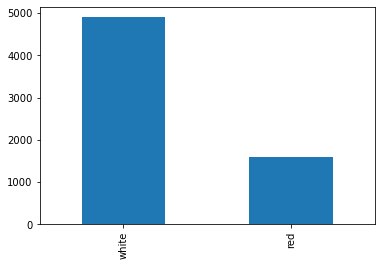

In [98]:
df_combined['type'].value_counts()
df_combined['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

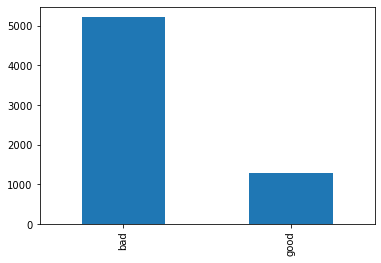

In [119]:
df_combined['class'].value_counts()
df_combined['class'].value_counts().plot(kind='bar')

In [120]:
# Histogram

In [123]:
fig = px.histogram(df, x='class’)

fig.show()

SyntaxError: EOL while scanning string literal (Temp/ipykernel_12388/1829718361.py, line 1)

In [ ]:
# Boxplot

In [125]:
fig = px.box(df, y="class”)

fig.show()

SyntaxError: EOL while scanning string literal (Temp/ipykernel_12388/2196592482.py, line 1)

In [ ]:
# Scatter

NameError: name 'plot' is not defined

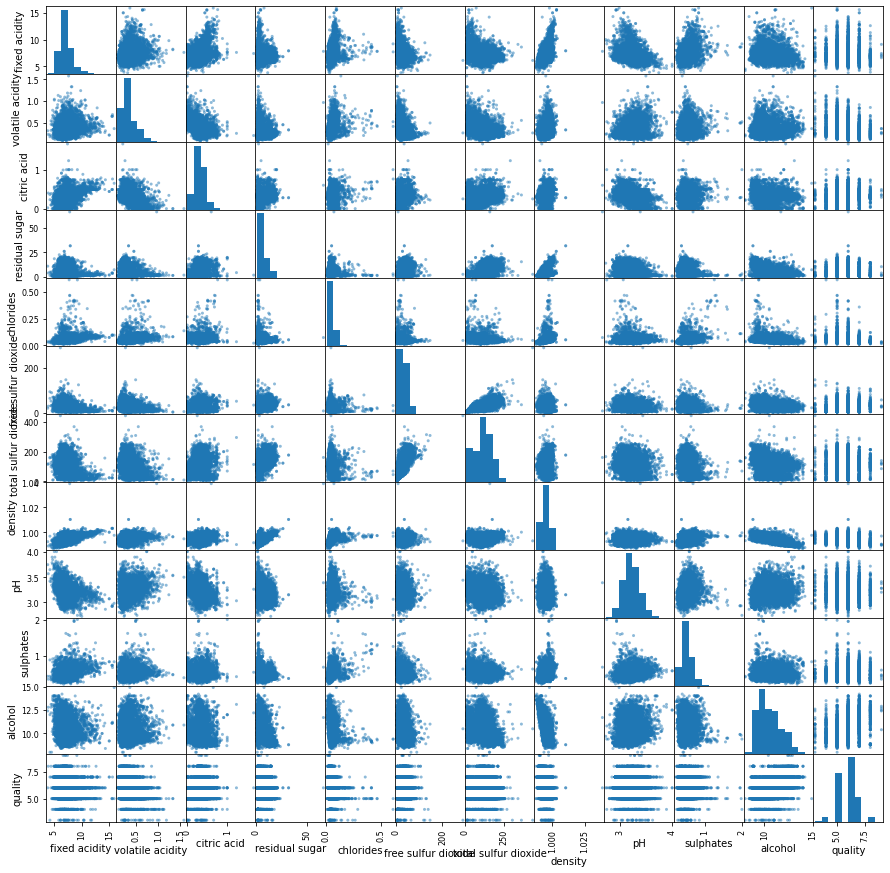

In [84]:
Scatter_df = df_combined[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                      'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol', 'quality','type', 'class']]

pd.plotting.scatter_matrix(Scatter_df, figsize=(15,15), diagonal='hist')

plot.show()

In [ ]:
# Heatmap

<AxesSubplot:>

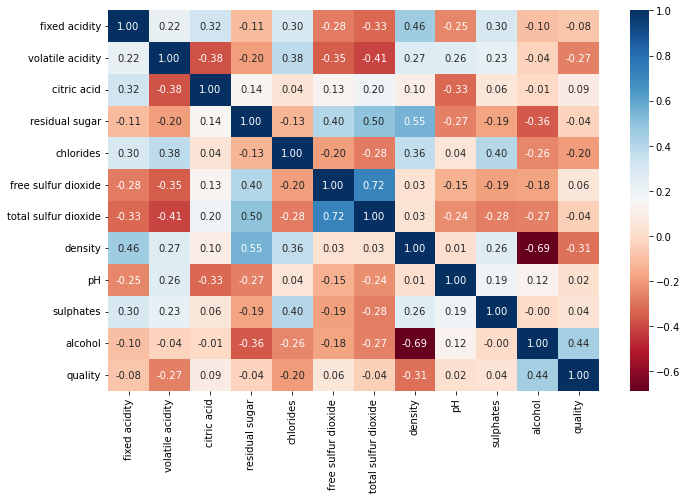

In [85]:
corr = Scatter_df.corr()

plt.figure(figsize=(11,7))
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu")